In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [3]:
wmodel = models.get_white_key_model(channels)

In [4]:
dataset.load_all_data(color=['white'], size=['single'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed white key: 19083
  # of unpressed white key: 56915


IntProgress(value=0, max=5000)

In testset: 
  # of pressed white key: 10831
  # of unpressed white key: 23112


IntProgress(value=0, max=2993)

In valset: 
  # of pressed white key: 5090
  # of unpressed white key: 12135


In [5]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=113830)

(2, 106, 21, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=46224)

(2, 106, 21, 3)
1 0
Samples from X_val: 


IntProgress(value=0, max=24270)

(2, 106, 21, 3)
1 0


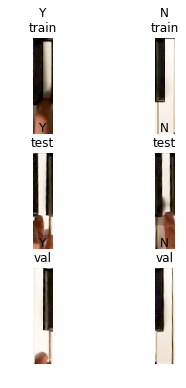

In [6]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb in dataset.data_batch(type=_type, size='single', color='white', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [12]:
wmodel.train(dataset, batch_size=32, size='single', color='white',
             concatenate=concat,
             num_epochs=10,
             weight_decay=0.05,
             max_num=-1,
             learning_rate=1e-4,
             decay_every=5,
             best_path='keypress_recognition/best_white_model.tar',
             current_path='keypress_recognition/current_white.tar',
             method=0)

Epoch 1/10


IntProgress(value=0, max=113830)

train Loss: 0.2432
[[55020  2554]
 [ 1908 54374]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=24270)

val Loss: 0.2651
[[11446   364]
 [  698 11780]]
Precision: 0.94
Recall   : 0.97
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 2/10


IntProgress(value=0, max=113830)

train Loss: 0.2330
[[55110  2428]
 [ 1818 54500]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=24270)

val Loss: 0.2682
[[11506   483]
 [  638 11661]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 3/10


IntProgress(value=0, max=113830)

train Loss: 0.2307
[[55135  2361]
 [ 1793 54567]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=24270)

val Loss: 0.2767
[[11610   624]
 [  534 11520]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 4/10


IntProgress(value=0, max=113830)

train Loss: 0.2269
[[55123  2306]
 [ 1805 54622]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=24270)

val Loss: 0.2507
[[11659   545]
 [  485 11599]]
Precision: 0.96
Recall   : 0.96
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 5/10


IntProgress(value=0, max=113830)

train Loss: 0.2264
[[55113  2353]
 [ 1815 54575]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=24270)

val Loss: 0.2732
[[11526   578]
 [  618 11566]]
Precision: 0.95
Recall   : 0.95
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 6/10


IntProgress(value=0, max=113830)

train Loss: 0.2116
[[55319  2175]
 [ 1609 54753]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24270)

val Loss: 0.2581
[[11658   574]
 [  486 11570]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 7/10


IntProgress(value=0, max=113830)

train Loss: 0.2055
[[55349  2125]
 [ 1579 54803]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24270)

val Loss: 0.2559
[[11670   563]
 [  474 11581]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 8/10


IntProgress(value=0, max=113830)

train Loss: 0.2030
[[55370  2129]
 [ 1558 54799]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24270)

val Loss: 0.2512
[[11657   543]
 [  487 11601]]
Precision: 0.96
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 9/10


IntProgress(value=0, max=113830)

train Loss: 0.2031
[[55380  2114]
 [ 1548 54814]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24270)

val Loss: 0.2724
[[11551   538]
 [  593 11606]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 10/10


IntProgress(value=0, max=113830)

train Loss: 0.2023
[[55377  2100]
 [ 1551 54828]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24270)

val Loss: 0.2632
[[11644   579]
 [  500 11565]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white.tar ...

Training complete in 11m 37s
Best val loss: 0.250673


IntProgress(value=0, max=46224)

(12, 106, 21, 3)
tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


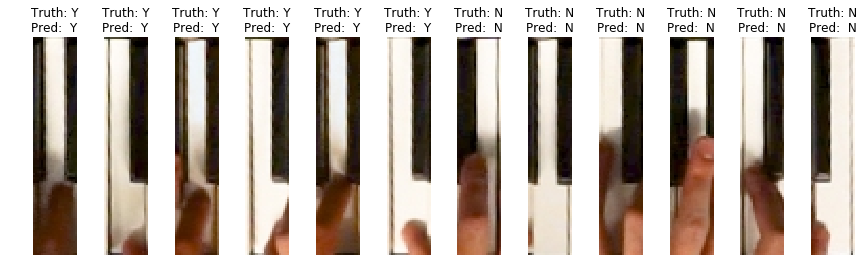

In [9]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb in dataset.data_batch(type='test', size='single', color='white', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = wmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()